### IDs:
Insert yours IDs to the cell below

ID #1:805859

ID #2: 204244255


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [49]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import multivariate_normal as mn
import numpy as np
from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import random
import math

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [3]:
def print_correlations(X, Y):
    pearson, p_v_pearson = stats.pearsonr(X,Y)
    tau, p_v_tau = stats.kendalltau(X,Y)
    rho, p_v_rho = stats.spearmanr(X,Y)
    print('Pearson Correlation:', pearson)
    print('Kendall Tau:', tau)
    print('Spearman Rho:', rho)
    
def plot_data(X,Y):
    df = pd.DataFrame(X, columns=['x']) 
    df['y'] = Y
    sns.jointplot(data=df, x="x", y="y")

    
def print_table(X,Y):
    df = pd.DataFrame(X, columns=['x']) 
    df['y'] = Y
    print(df)

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

Pearson Correlation: -0.9284182895339134
Kendall Tau: 0.92
Spearman Rho: 0.8823529411764706

Excluding 1 point:
Pearson Correlation: 1.0
Kendall Tau: 0.9999999999999998
Spearman Rho: 0.9999999999999999
       x      y
0    0.0   0.00
1    0.1   0.01
2    0.2   0.02
3    0.3   0.03
4    0.4   0.04
5    0.5   0.05
6    0.6   0.06
7    0.7   0.07
8    0.8   0.08
9    0.9   0.09
10   1.0   0.10
11   1.1   0.11
12   1.2   0.12
13   1.3   0.13
14   1.4   0.14
15   1.5   0.15
16   1.6   0.16
17   1.7   0.17
18   1.8   0.18
19   1.9   0.19
20   2.0   0.20
21   2.1   0.21
22   2.2   0.22
23   2.3   0.23
24   2.4   0.24
25   2.5   0.25
26   2.6   0.26
27   2.7   0.27
28   2.8   0.28
29   2.9   0.29
30   3.0   0.30
31   3.1   0.31
32   3.2   0.32
33   3.3   0.33
34   3.4   0.34
35   3.5   0.35
36   3.6   0.36
37   3.7   0.37
38   3.8   0.38
39   3.9   0.39
40   4.0   0.40
41   4.1   0.41
42   4.2   0.42
43   4.3   0.43
44   4.4   0.44
45   4.5   0.45
46   4.6   0.46
47   4.7   0.47
48   4.8   0.4

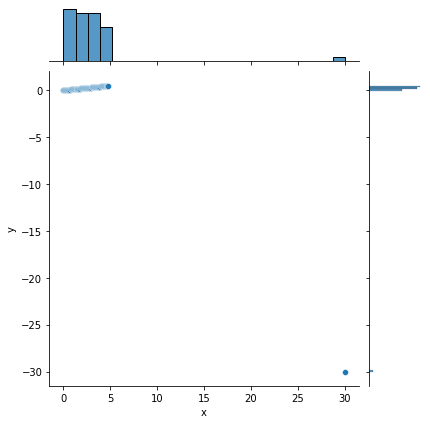

In [4]:
x = np.arange(0,4.9,0.1)
y = np.arange(0,0.49,0.01)

#introduce outlier where Pearson correlation is extremely sensitive
x = np.append(x,30)
y = np.append(y,-30)
print_correlations(x,y)

#extract last added point> calcuate with n-1. 
print('\nExcluding 1 point:')
print_correlations(x[:-1], y[:-1])
plot_data(x,y)
print_table(x,y)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

Pearson Correlation: -0.8463810930576072
Kendall Tau: -0.020408163265306124
Spearman Rho: -0.5006002400960383
       x     y
0    0.0   0.0
1    0.2   0.2
2    0.4   0.4
3    0.6   0.6
4    0.8   0.8
5    1.0   1.0
6    1.2   1.2
7    1.4   1.4
8    1.6   1.6
9    1.8   1.8
10   2.0   2.0
11   2.2   2.2
12   2.4   2.4
13   2.6   2.6
14   2.8   2.8
15   3.0   3.0
16   3.2   3.2
17   3.4   3.4
18   3.6   3.6
19   3.8   3.8
20   4.0   4.0
21   4.2   4.2
22   4.4   4.4
23   4.6   4.6
24   4.8   4.8
25 -10.0  10.0
26  -9.8  10.2
27  -9.6  10.4
28  -9.4  10.6
29  -9.2  10.8
30  -9.0  11.0
31  -8.8  11.2
32  -8.6  11.4
33  -8.4  11.6
34  -8.2  11.8
35  -8.0  12.0
36  -7.8  12.2
37  -7.6  12.4
38  -7.4  12.6
39  -7.2  12.8
40  -7.0  13.0
41  -6.8  13.2
42  -6.6  13.4
43  -6.4  13.6
44  -6.2  13.8
45  -6.0  14.0
46  -5.8  14.2
47  -5.6  14.4
48  -5.4  14.6
49  -5.2  14.8


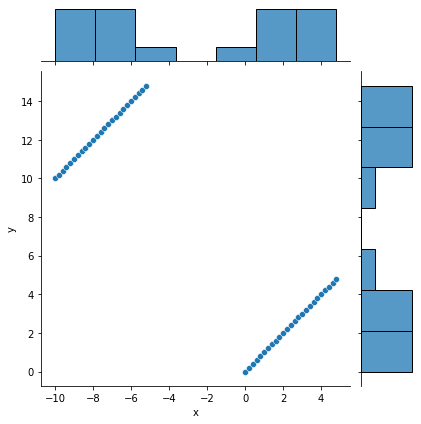

In [5]:
x = np.arange(0,5, 0.2)
y = np.arange(0,5, 0.2)

x_a = x.copy()
x_a = x - 10
x = np.append(x, x_a)

y_a = y.copy()
y_a = y + 10
y = np.append(y, y_a)

print_correlations(x,y)
plot_data(x,y)
print_table(x,y)

#For Kendall, making the number of concordant pairs to be the same as the discordant ones so it is near 0.
#For Spearman, build a negative correlation (with at least -0.5) by making the top half rank of x match to the bottom half points of y

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

Pearson Correlation: 0.6937785817951191
Kendall Tau: 0.020408163265306124
Spearman Rho: 0.5006002400960383
      x     y
0   0.0  -0.0
1   0.2  -0.2
2   0.4  -0.4
3   0.6  -0.6
4   0.8  -0.8
5   1.0  -1.0
6   1.2  -1.2
7   1.4  -1.4
8   1.6  -1.6
9   1.8  -1.8
10  2.0  -2.0
11  2.2  -2.2
12  2.4  -2.4
13  2.6  -2.6
14  2.8  -2.8
15  3.0  -3.0
16  3.2  -3.2
17  3.4  -3.4
18  3.6  -3.6
19  3.8  -3.8
20  4.0  -4.0
21  4.2  -4.2
22  4.4  -4.4
23  4.6  -4.6
24  4.8  -4.8
25  5.0  10.0
26  5.2   9.8
27  5.4   9.6
28  5.6   9.4
29  5.8   9.2
30  6.0   9.0
31  6.2   8.8
32  6.4   8.6
33  6.6   8.4
34  6.8   8.2
35  7.0   8.0
36  7.2   7.8
37  7.4   7.6
38  7.6   7.4
39  7.8   7.2
40  8.0   7.0
41  8.2   6.8
42  8.4   6.6
43  8.6   6.4
44  8.8   6.2
45  9.0   6.0
46  9.2   5.8
47  9.4   5.6
48  9.6   5.4
49  9.8   5.2


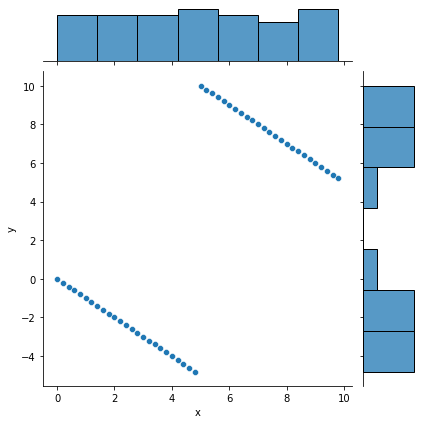

In [6]:
x = np.arange(0,5, 0.2)
y = np.arange(0,5, 0.2) * -1

x_a = np.arange(0,5, 0.2) + 5
x = np.append(x, x_a)

y_a = (np.arange(0,5, 0.2) * -1 ) + 10
y = np.append(y, y_a)


print_correlations(x,y)
plot_data(x,y)
print_table(x,y)

#Close to 0 Kendall correlation as there are similar amount of concordant and discordant pairs.
#Build positive but not high Spearman Rho with the top half of both ranks be coincident but monotonically decreasing. 
#Same for the other half, bottom set of points of X is also bottom half for Y, organized decreasing as well.
#The rank in x is kept increasing, for Y is decreasing but in halves.


#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

Covariance x,y = -6.236799999999998
Pearson Correlation: -0.6053785572579601
Kendall Tau: 0.92
Spearman Rho: 0.8823529411764706
       x     y
0    0.0   1.0
1    0.1   1.1
2    0.2   1.2
3    0.3   1.3
4    0.4   1.4
5    0.5   1.5
6    0.6   1.6
7    0.7   1.7
8    0.8   1.8
9    0.9   1.9
10   1.0   2.0
11   1.1   2.1
12   1.2   2.2
13   1.3   2.3
14   1.4   2.4
15   1.5   2.5
16   1.6   2.6
17   1.7   2.7
18   1.8   2.8
19   1.9   2.9
20   2.0   3.0
21   2.1   3.1
22   2.2   3.2
23   2.3   3.3
24   2.4   3.4
25   2.5   3.5
26   2.6   3.6
27   2.7   3.7
28   2.8   3.8
29   2.9   3.9
30   3.0   4.0
31   3.1   4.1
32   3.2   4.2
33   3.3   4.3
34   3.4   4.4
35   3.5   4.5
36   3.6   4.6
37   3.7   4.7
38   3.8   4.8
39   3.9   4.9
40   4.0   5.0
41   4.1   5.1
42   4.2   5.2
43   4.3   5.3
44   4.4   5.4
45   4.5   5.5
46   4.6   5.6
47   4.7   5.7
48   4.8   5.8
49  20.0 -20.0


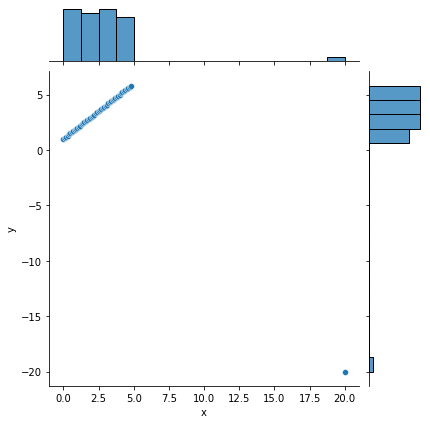

In [7]:
x = np.arange(0,4.9,0.1)
y = np.arange(1,5.9,0.1)

#add outlier that increases variance and modifies ranks for Spearman but turns the covariance between x and y (for Pearson) to be negative
x = np.append(x,20)
y = np.append(y,-20)
print('Covariance x,y =',np.cov([x,y])[0,1])

print_correlations(x,y)
plot_data(x,y)
print_table(x,y)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

Covariance x,y = 2.3847999999999994
Pearson Correlation: 0.3693603133953244
Kendall Tau: -0.92
Spearman Rho: -0.8823529411764706
       x     y
0    0.0   0.0
1    0.1  -0.1
2    0.2  -0.2
3    0.3  -0.3
4    0.4  -0.4
5    0.5  -0.5
6    0.6  -0.6
7    0.7  -0.7
8    0.8  -0.8
9    0.9  -0.9
10   1.0  -1.0
11   1.1  -1.1
12   1.2  -1.2
13   1.3  -1.3
14   1.4  -1.4
15   1.5  -1.5
16   1.6  -1.6
17   1.7  -1.7
18   1.8  -1.8
19   1.9  -1.9
20   2.0  -2.0
21   2.1  -2.1
22   2.2  -2.2
23   2.3  -2.3
24   2.4  -2.4
25   2.5  -2.5
26   2.6  -2.6
27   2.7  -2.7
28   2.8  -2.8
29   2.9  -2.9
30   3.0  -3.0
31   3.1  -3.1
32   3.2  -3.2
33   3.3  -3.3
34   3.4  -3.4
35   3.5  -3.5
36   3.6  -3.6
37   3.7  -3.7
38   3.8  -3.8
39   3.9  -3.9
40   4.0  -4.0
41   4.1  -4.1
42   4.2  -4.2
43   4.3  -4.3
44   4.4  -4.4
45   4.5  -4.5
46   4.6  -4.6
47   4.7  -4.7
48   4.8  -4.8
49  15.0  15.0


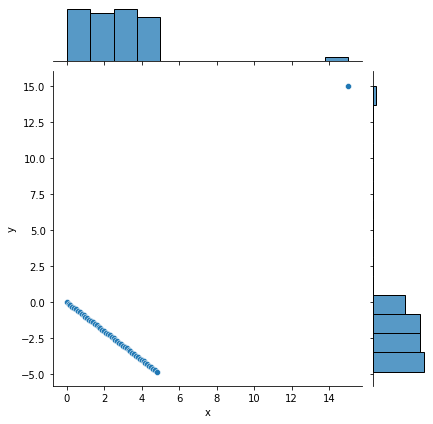

In [8]:
#As both are bounded in -1<r<1, the condition implies that Spearman rho is negative and Pearson positive.
#Build negative monotone decreasing set of point to have a negative rho and add outlier where Pearson will be sensitive and turns the covariance(x,y) to positive
x = np.arange(0,4.9,0.1)
y = np.arange(0,-4.9,-0.1)

x = np.append(x,15)
y = np.append(y,15)
print('Covariance x,y =',np.cov([x,y])[0,1])
print_correlations(x,y)
plot_data(x,y)
print_table(x,y)


#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

Both Spearman and Kendall correlation are bounded from -1 to 1. Then, to fulfill the condition, we must find a dataset that has Spearman correlation > 0 (postive) but a Kendall correlation > 0 (negative).
Having a positive Spearman coefficient means that when computing the distance (or difference) in rank  between the two datasets X and Y, in most of the cases, Y will tend to increase as X increases.
With this scenario, we will have as well a greater amount of concordant pairs -than the number of discordant- in Kendall calculation. This would result in a positive tau as well contradicting the condition.


### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [10]:
df = pd.read_csv('heart.csv', sep = '\t')
numerical_features = ['age','trestbps','chol', 'thalach', 'oldpeak']
categorical_features = list(set(df.columns) - set(numerical_features))

In [11]:
#Fills in median for missing numerical values 
for feature in numerical_features:
    median = np.nanmedian(df[feature], axis = 0)
    df[feature].fillna(median, inplace = True)

#Fills in mode for missing categorical values
for feature in categorical_features:    
    mode = stats.mode(df[feature],  nan_policy = 'omit').mode[0]
    df[feature].fillna(mode, inplace = True)
    
#df.describe()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,0.0,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,130.0,240.0,0.0,0.0,172.0,0,1.4,2,0,2,1
3,55.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,55.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


#####  Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 

In [12]:
num_features = numerical_features + ['target']
data = df[num_features].groupby('target').agg([np.mean, np.std, np.size])
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
#data

In [13]:
number_of_features = len(numerical_features)

#Calculating confidence interval of 95% (z-score 1.96) where mean of healthy pop > mean of disease 
for i in range(0,number_of_features*3,3):
    healthy_mean, healthy_sd, n1 = data.iloc[0,i:i+3]
    disease_mean, disease_sd,n2 = data.iloc[1,i:i+3]
    diff_healthy_grt_disease = healthy_mean - disease_mean
    #sp = np.sqrt(((n1)* (healthy_sd**2) )+ ((n2-1)*(disease_sd**2)))/(n1+n2-2)
    se = np.sqrt((healthy_sd**2/n1)+(disease_sd**2/n2))
    upper = diff_healthy_grt_disease + (z*se)
    lower = diff_healthy_grt_disease - (z*se)
    print(f'Numerical feature: {data.columns[i][0]}')
    #print(f'95% confident that the mean of healthy is greater than the mean of disease by a range of: ({lower},{upper})')
    print(f'''With 95% confidence the difference in the means of {data.columns[i][0]} in healthy vs. disease population
is within the range:({np.round(lower,3)},{np.round(upper,3)})\n''')

Numerical feature: age
With 95% confidence the difference in the means of age in healthy vs. disease population
is within the range:(2.206,6.097)

Numerical feature: trestbps
With 95% confidence the difference in the means of trestbps in healthy vs. disease population
is within the range:(1.136,9.031)

Numerical feature: chol
With 95% confidence the difference in the means of chol in healthy vs. disease population
is within the range:(-2.893,20.244)

Numerical feature: thalach
With 95% confidence the difference in the means of thalach in healthy vs. disease population
is within the range:(-24.112,-14.592)

Numerical feature: oldpeak
With 95% confidence the difference in the means of oldpeak in healthy vs. disease population
is within the range:(0.735,1.231)



##### Discussion:
* The above confidence intervals were calculated based on $ mean_{feature,healthy} - mean_{feature,disease}$. 


* We will state the null hypothesis to be that the healthy population mean is the same as the disease population mean. According to the null hypothesis, $ mean_{feature,healthy} - mean_{feature,disease} = 0 $ as we expect to see this value in the confidence interval.


* For features: age, trestbps, and oldpeak the confidence interval ranges were postivie (upper and lower limits are both over 0). Since 0 is outside these confidence intervals, we can reject the null hypothesis with a p-value of alpha/2 = 0.025 and state that there is a differnce between the healthy and disease populations. Furthermore, since the ranges are all positive we can deduce with 95% confidence that the mean of the healthy population is greater than the mean of the disease. In other words, lower limit ≤ $ mean_{feature,healthy} - mean_{feature,disease}$ ≤ upper limit.


* For thalac feature, the upper and lower limit of the range are below 0, meaning 0 does not lie in the confidence range. Again we can reject the null hypothesis and state that with 95% there is a difference between healthy and disease population. Since the interval is all negative values, $ mean_{thalac,healthy} < mean_{thalac,disease} $ . 


* For chol feature, 0 $\in$ confidence interval so we cannot reject the null hypothesis that states there is no idfference. In other words, we canot say with 95% that the difference in means of the healthy vs disease population is distinguishable in either direction. 

#### Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

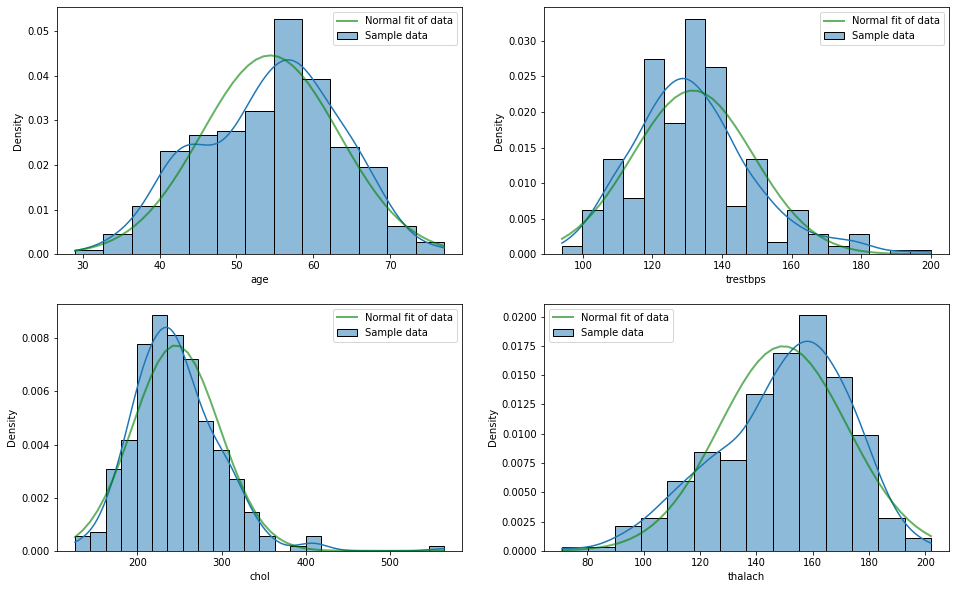

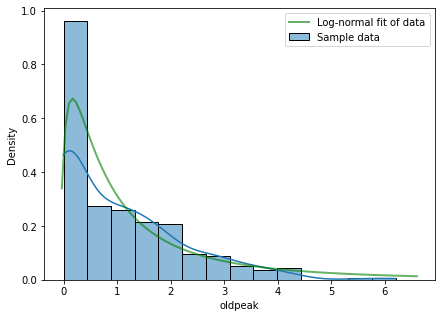

0.0

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Fitting normal curve to numerical feature data with histograms
for i in range(number_of_features-1):
    if i<2:
        gaus = stats.norm.fit(df[numerical_features[i]])
        sns.histplot(ax = axes[0,i] , data= df[numerical_features[i]], stat = 'density', kde=True, label = 'Sample data')
        min_value = min(df[numerical_features[i]])
        max_value = max(df[numerical_features[i]])
        x = np.linspace(min_value,max_value)
        axes[0,i].plot(x, stats.norm.pdf(x,loc = gaus[0], scale = gaus[1]),'g-', lw=2, alpha=0.6, label='Normal fit of data')
        axes[0,i].set_xlabel(numerical_features[i])
        axes[0,i].legend()
    else:
        sns.histplot(ax =axes[1,i-2], data = df[numerical_features[i]], stat = 'density', kde=True, label = 'Sample data')
        gaus = stats.norm.fit(df[numerical_features[i]])
        min_value = min(df[numerical_features[i]])
        max_value = max(df[numerical_features[i]])
        x = np.linspace(min_value,max_value)
        axes[1,i-2].plot(x, stats.norm.pdf(x,loc = gaus[0], scale = gaus[1]),'g-', lw=2, alpha=0.6, label='Normal fit of data')
        axes[1,i-2].set_xlabel(numerical_features[i])
        axes[1,i-2].legend()
plt.show()

# Fitting to lognormal curve where the distributions are shifted 0.1 to left to account for 0 value
fig, ax = plt.subplots(1, figsize=(7,5))
sns.histplot(df[numerical_features[4]], stat = 'density', kde = True, label = 'Sample data')
gaus = stats.norm.fit(df[numerical_features[4]])
log = stats.lognorm.fit(df[numerical_features[4]])
s = gaus[1]
x = (np.linspace(stats.lognorm.ppf(0.01, s),
                stats.lognorm.ppf(0.95, s), 100)) 

ax.plot(x-0.1,stats.lognorm.pdf(x,s),'g-', lw=2, alpha=0.6, label='Log-normal fit of data')
ax.set_xlabel(numerical_features[4])
ax.legend()
plt.show()
stats.lognorm.pdf(0.00, s)

##### Discussion:
The blue curve is the kde of the data.The green curve is the curve of the best fit distribution of the sample data. Features: age, trestbps, chol, and thalach fit nicely to a single gausssian curve.
Feature: oldpeak fits nicely to a lognormal curve. Note that the lognormal curve has probability 0 of being at value x = 0 since log at 0 is not defined. However, in thi case we have values of oldpeak = 0, therefore we shifted the pdf curve by 0.1 to account for smaller values that appear in the data.

#### For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

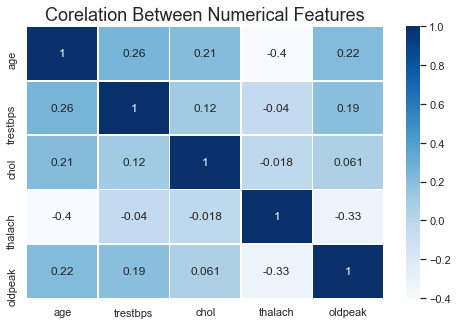

In [15]:
#Pearson correlation method, overview of all numerical feature correlations
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (8, 5) 
sns.heatmap(df[numerical_features].corr(), annot = True, linewidths=0.5, cmap="Blues")
plt.title('Corelation Between Numerical Features', fontsize = 18)
plt.show()

We will look deeper into the following pairs of numerical features
1. Thalach and age:
    * We saw in the section above that thalach and age have a bivariate normal distribution
    * We will calculate the p-value of their pearson correlation where the null hypothesis is that they are bivariate normal distributions that are independent. We will get that the p-value is significant and thus can reject the null hypothesis. Therefore, the null model is either not bivariate normal or not independent. Since we saw that the models are in fact bivariate normal, the assumption we can reject is the independence assumption.
2. Trestbps and age:
    * We saw in the section above that trestbps and age have a bivariate normal distribution
    * We will calculate the p-value of their pearson correlation where the null hypothesis is that they are bivariate normal distributions that are independent. We will get that the p-value is significant and thus can reject the null hypothesis. Therefore, the null model is either not bivariate normal or not independent. Since we saw that the models are in fact bivariate normal, the assumption we can reject is the independence assumption.
3. Thalach and oldpeak:
    * Thalach is normally distributed but oldpeak is log-nornal
    * So we will calculate the p-value of their spearman correlation where the null hypothesis is that the rank permutations are independent and uniform. Again we will conclude that the null model can be rejected and that the permutations are not independent. 

In [16]:
cor1 = stats.pearsonr(df['thalach'], df['age'])
print(f'p-value of pearson corr(thalach, age): {cor1[1]}')
cor2 = stats.pearsonr(df['trestbps'], df['age'])
print(f'p-value of pearson corr(trestbps, age): {cor2[1]}')
cor3 = stats.spearmanr(df['thalach'], df['oldpeak'])
print(f'p-value of spearman corr(thalach, oldpeak): {cor3[1]}')
print('All p-values are statistically significant!')

p-value of pearson corr(thalach, age): 3.556043738767052e-13
p-value of pearson corr(trestbps, age): 5.9638572417740865e-06
p-value of spearman corr(thalach, oldpeak): 2.636153661049674e-14
All p-values are statistically significant!


In [17]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov, features):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape), levels=5, alpha=0.3, colors='b')
    ax.axis('auto')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_title('Bivariate normal distribution',fontsize = 13, weight = 'bold')
    ax.grid(alpha=0.2)
    plt.show()

Pearson correlation coefficient between thalach and age is: -0.4016712445609852


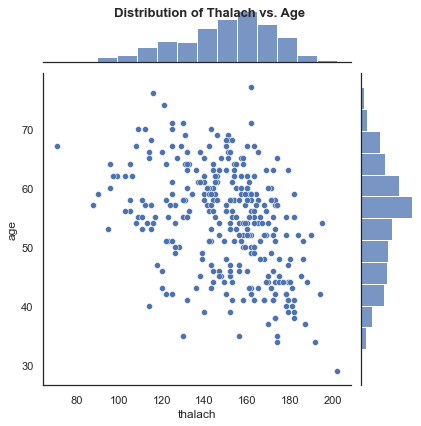

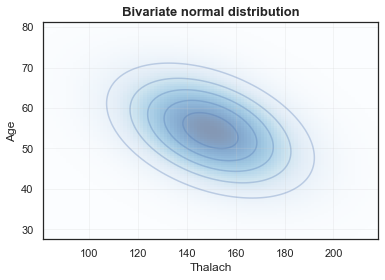

In [18]:
print(f'Pearson correlation coefficient between thalach and age is: {cor1[0]}')
p = sns.jointplot(data = df,x = 'thalach', y='age' )
p.fig.suptitle("Distribution of Thalach vs. Age", fontsize = 13, weight = 'bold')
plt.plot()

mins = [min(df['thalach']), min(df['age'])]
maxs = [max(df['thalach']), max(df['age'])]

thalac = stats.norm.fit(df['thalach'])
age = stats.norm.fit(df['age'])
means = np.array([thalac[0], age[0]])
covs = np.cov(df[['thalach', 'age']], rowvar= False )
plot_2d_Gaussian_pdf(means, covs, ['Thalach', 'Age'])

Pearson correlation coefficient between trestbps and age is: 0.2567942326304408


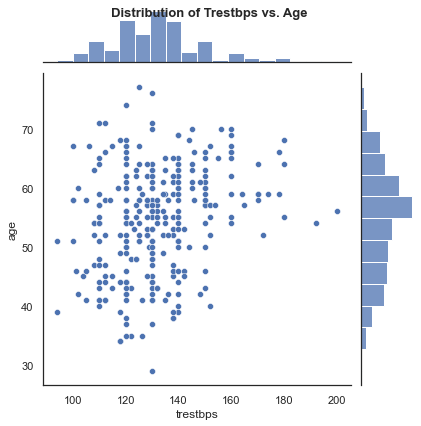

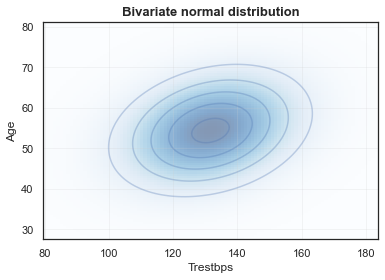

In [19]:
print(f'Pearson correlation coefficient between trestbps and age is: {cor2[0]}')
p = sns.jointplot(data = df,x = 'trestbps', y='age' )
p.fig.suptitle("Distribution of Trestbps vs. Age", fontsize = 13, weight = 'bold')
plt.plot()

mins = [min(df['trestbps']), min(df['age'])]
maxs = [max(df['trestbps']), max(df['age'])]

trestbps = stats.norm.fit(df['trestbps'])
age = stats.norm.fit(df['age'])
means = np.array([trestbps[0], age[0]])
covs = np.cov(df[['trestbps', 'age']], rowvar= False )
plot_2d_Gaussian_pdf(means, covs, ['Trestbps', 'Age'])

Spearman correlation coefficient between thalach and oldpeak: -0.4189181346651152
***It is important to note that the joint distribution is not bivariate normal since oldpeak is not normally distributed, thus this is not an accurate representation of the data***


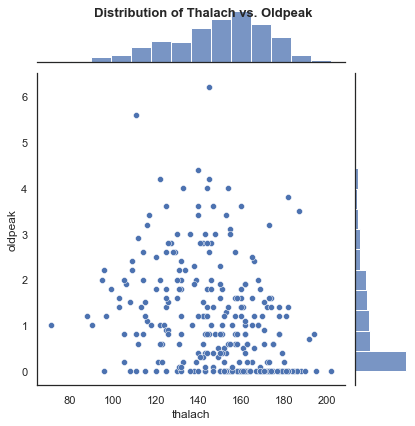

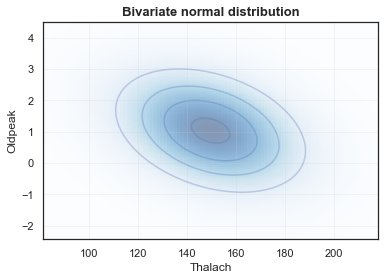

In [20]:
print(f'Spearman correlation coefficient between thalach and oldpeak: {cor3[0]}')
print('***It is important to note that the joint distribution is not bivariate normal since oldpeak is not normally distributed, thus this is not an accurate representation of the data***')
p = sns.jointplot( data = df,x = 'thalach', y='oldpeak' )
plt.plot()
p.fig.suptitle("Distribution of Thalach vs. Oldpeak", fontsize = 13, weight = 'bold')
plt.plot()

thalac = stats.norm.fit(df['thalach'])
oldpeak = stats.norm.fit(df['oldpeak'])
means = np.array([thalac[0], oldpeak[0]])
covs = np.cov(df[['thalach', 'oldpeak']], rowvar= False )
plot_2d_Gaussian_pdf(means, covs, ['Thalach', 'Oldpeak'])

#### Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

As we can see in the barplot below, the distribution of healthy and disease in male and females is not evently distributed. We will divide up the dataset into male and female dataset and perform correlation analysis. 

[]

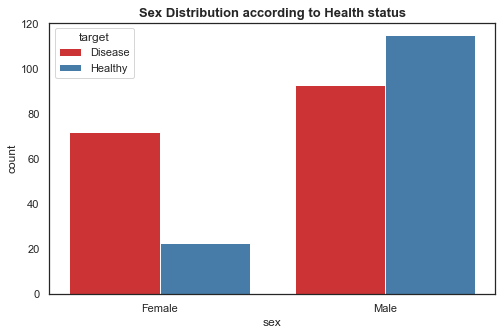

In [21]:
df.target = df.target.replace({0:'Healthy', 1:'Disease'})

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot(x='sex', hue='target', data=df, palette = sns.color_palette("Set1"))
#ax.legend(labels = ['Healthy', 'Disease'])
ax.set_title("Sex Distribution according to Health status", fontsize = 13, weight = 'bold')
ax.set_xticklabels(['Female', 'Male'])
plt.plot()

In [22]:
#1 = male, 0 = female
df2 = df[numerical_features + ['sex']]
males = df2[df2['sex'] == 1]
females = df2[df2['sex'] == 0]

# Calculating pearson correlations with p-value < 0.05
for i in range(len(numerical_features)):
    for j in range(i, len(numerical_features)):
        x_value = numerical_features[i]
        y_value = numerical_features[j]
        if x_value == y_value:
            continue
        #print(x_value,y_value )
        fem = stats.pearsonr(females[x_value] ,females[y_value])
        mal = stats.pearsonr(males[x_value], males[y_value])
        if (fem[1] < 0.05) and (mal[1] > 0.05):
            print(f'Female population has significant correlation for: {x_value} vs {y_value} while male population has no significance')
            print(f'p-value for females {fem[1]}, Pearson correlation for females {fem[0]}')
            print(f'p-value for males: {mal[1]}, , Pearson correlation for males: {mal[0]}\n')

        if (fem[1] > 0.05) and (mal[1] < 0.05):
            print(f'Male population has significant correlation for: {x_value} vs {y_value} while female population has no significance')
            print(f'p-value for females {fem[1]}, p-value for male: {mal[1]}') 
            print(f'Pearson correlation for females {fem[0]}, correlation for male: {mal[0]}\n')
            

Female population has significant correlation for: trestbps vs oldpeak while male population has no significance
p-value for females 9.572956503027135e-05, Pearson correlation for females 0.3894818769616579
p-value for males: 0.11819177735866322, , Pearson correlation for males: 0.10866734824738598



[]

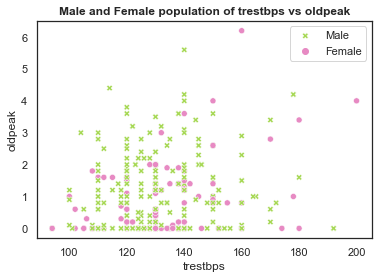

In [23]:
sns.scatterplot(data = df,x = 'trestbps', y='oldpeak' , hue = 'sex', style = 'sex', palette = sns.color_palette("Set2")[3:5])
plt.legend(['Male', 'Female'])
plt.title('Male and Female population of trestbps vs oldpeak', fontweight = 'bold')
plt.plot()

##### Discussion
* We determined correlation based on pearson correlation values becasue not all the numerical features are normally distributed.

* We will say that significant values have a p-value < 0.05

* The only pair that was significant in female population but not in male was trestbps and oldpeak, there were no pairs significant in males that are not significant for females as well.

* As you can see in the plot above, the green dots are randomly scattered as these values have no significant correlation among men. However, among females in the pink dots, there is a slightly positive correlation that matches the pearson correlation coefficient of 0.389

In [24]:
df2 = df[numerical_features + ['target']]
disease = df2[df2['target'] == 'Disease']
healthy = df2[df2['target'] == 'Healthy']

# Calculating pearson correlations with p-value < 0.01
for i in range(len(numerical_features)):
    for j in range(i, len(numerical_features)):
        x_value = numerical_features[i]
        y_value = numerical_features[j]
        if x_value == y_value:
            continue
        fem = stats.pearsonr(disease[x_value] ,disease[y_value])
        mal = stats.pearsonr(healthy[x_value], healthy[y_value])
        if (fem[1] < 0.01) and (mal[1] > 0.01):
            print(f'Disease population has significant correlation for: {x_value} vs {y_value} while healthy population has no significance')
            print(f'p-value for disease {fem[1]}, Pearson correlation for disease {fem[0]}')
            print(f'p-value for healthy: {mal[1]}, Pearson correlation for healthy: {mal[0]}\n')

        if (fem[1] > 0.01) and (mal[1] < 0.01):
            print(f'Healthy population has significant correlation for: {x_value} vs {y_value} while disease population has no significance')
            print(f'p-value for disease {fem[1]}, p-value for healthy: {mal[1]}') 
            print(f'Pearson correlation for disease {fem[0]}, correlation for healthy: {mal[0]}\n')

Disease population has significant correlation for: age vs chol while healthy population has no significance
p-value for disease 0.0020851070364645017, Pearson correlation for disease 0.23796648118637337
p-value for healthy: 0.1256441795264016, Pearson correlation for healthy: 0.13099960143404982

Disease population has significant correlation for: age vs thalach while healthy population has no significance
p-value for disease 3.329564537668829e-13, Pearson correlation for disease -0.5275420051360303
p-value for healthy: 0.11611039893368287, Pearson correlation for healthy: -0.13437376695371536



[]

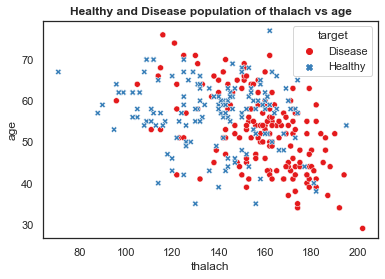

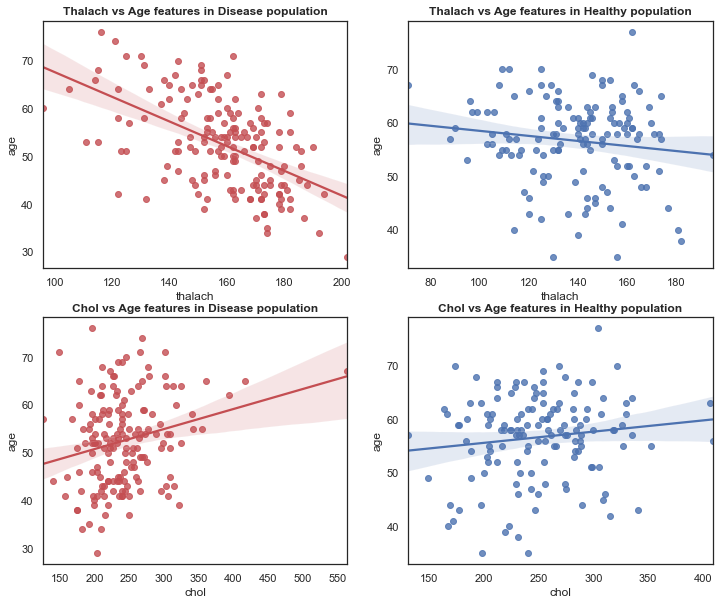

In [25]:
sns.scatterplot(data = df,x = 'thalach', y='age' , hue = 'target', style = 'target', palette = 'Set1')
plt.title('Healthy and Disease population of thalach vs age', fontweight = 'bold')
plt.plot()

#Add correlation coef to title per table
fig, axes = plt.subplots(2,2, figsize=(12,10))
sns.regplot(ax = axes[0,0] , data = disease,x = 'thalach', y='age', color = 'r' )
axes[0,0].set_title('Thalach vs Age features in Disease population', fontweight = 'bold')

sns.regplot(ax = axes[0,1], data = healthy,x = 'thalach', y='age' )
axes[0,1].set_title('Thalach vs Age features in Healthy population', fontweight = 'bold')

sns.regplot(ax = axes[1,0] , data = disease,x = 'chol', y='age', color = 'r' )
axes[1,0].set_title('Chol vs Age features in Disease population', fontweight = 'bold')

sns.regplot(ax = axes[1,1], data = healthy,x = 'chol', y='age' )
axes[1,1].set_title('Chol vs Age features in Healthy population', fontweight = 'bold')
plt.plot()


##### Discussion
* We determined correlation based on pearson correlation values becasue not all the numerical features are normally distributed.

* We will say that significant values have a p-value < 0.01

* The pairs that were significant in disease but in significant in healthy population are: age vs. chol and age vs. thalach

* Spearman correlations were also calculated for the 2 pairs and their p-values were significant. Thalach vs age has spearman correlation 0.2 and chol vs age has spearman correlation -0.5, both similar to the pearson values. The regplots above show another way to visuallize the linear relationship of the feature pairs, that better matches their spearman coefficents. In the red disease populations, the data is better fit to the lines, which shows that they have stronger more significant correlations.  In the blue healthy population, the linear regression lines have minimal slope as there is no significance to their correlation values.  

#### For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

In [26]:
age_groups = pd.cut(df["age"], 12)

[]

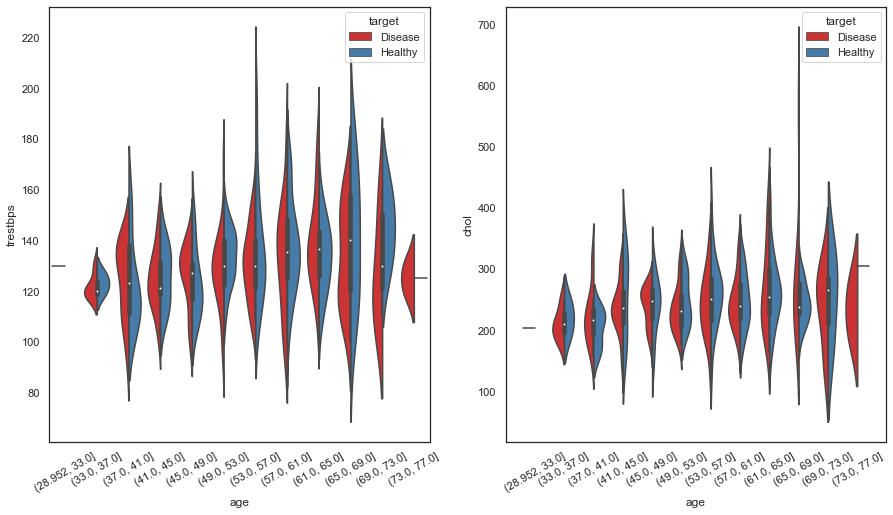

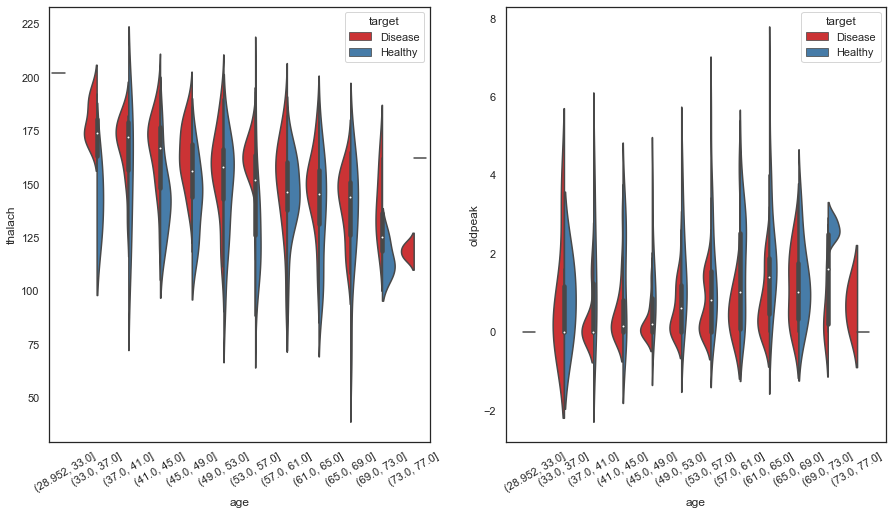

In [27]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.violinplot(ax=axes[0] , x=age_groups, y="trestbps", hue='target',data=df, split=True, palette = sns.color_palette("Set1"))
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation= 30)

sns.violinplot(ax=axes[1] , x=age_groups, y="chol", hue='target',data=df, split=True, palette = sns.color_palette("Set1"))
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation= 30)

plt.plot()

fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.violinplot(ax=axes[0] , x=age_groups, y="thalach", hue='target',data=df, split=True, palette = sns.color_palette("Set1"))
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation= 30)


sns.violinplot(ax=axes[1] , x=age_groups, y="oldpeak", hue='target',data=df, split=True, palette = sns.color_palette("Set1"))
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation= 30)

plt.plot()



#### Suggest, state and address at least one original question.


In [28]:
men = df[df['sex'] == 1]
mean = np.mean(men['trestbps'])
std = np.std(men['trestbps'])
print(f'Mean of trestbps in men: {mean}, standard deviation of trestbps in men: {std}')
split_by_restecg = men[numerical_features+['restecg']].groupby(['restecg']).agg([np.mean, np.std, np.size])
split_by_restecg['trestbps']

Mean of trestbps in men: 130.91346153846155, standard deviation of trestbps in men: 16.584927457995775


,mean,std,size
restecg,,,
0.0,133.708738,18.086194,103.0
1.0,128.307692,14.631444,104.0
2.0,114.000000,NaN,1.0


##### Discussion:
* The sample size of the men is more evenly distributed between healthy and disease patients. It is hard to make any significant conclusions involving the subpopulation of healthy women since the sample size is small. So instead we will take a look at the 208 samples from the men population. 


* After performing some groupings of the mens data by certain categorical features like fbs, restecg, exang we decided to look deeper at the restecg feature. 


* Restecg is a discrete variable representing electrocardiogram on rest results: 
    * Value 0: probable left ventricular hypertrophy 
    * Value 1: normal 
    * Value 2: abnormalities in the T wave or ST segment 

* Since there is only 1 sample for restecg = 2 we will ignore this sample and continue the analysis on restecg values 0 and 1.

* Trestbps is the resting blood pressure of patients when they enter the hospital

* We noticed that patients with restecg = 0 have a mean trestbps value slightly above the mean tresbps of all patients and patients with restecg = 1 have a mean trestbps value slightly below the mean tresbps of all patients. So we will perform a t-test on the data to determine is this differnce is significantly significant. Specfically, we want to perform a one-sided test to determine if the mean of the normal men population is less than the mean of the left ventricular hypertrophy men population. Its important to note that the asusmptions for this test are satisfied: the standard deviations between the two populations are clsoe and they are normally distributed.  

* Formally, we are asking: Is the mean trestbps in males with normal ecg on rest results lower than the mean trestbps in males with probable left ventricular hypertrophy. 

* The null hypothesis: $mean_{normal,men} \geq mean_{leftventricular hypertrophy, men}$. We set this as the null hypothesis so that if the results are significant we can reject the null hypothesis and state the opposite relation that $mean_{normal,men} < mean_{leftventricular hypertrophy, men}$. 

* The following are the results for the one-sided t-test. 


<!-- 
* Based on the grouped calculated above the for mens population, the thalach mean for healthy patients is lower than the disease patients which may seem non-intuitive since the maximal heart rate achieved seems to be correlated with better healthy. However the mean age group of the disease population is lower than the healthy and so this may have some  impact.  

* So instead of splitting the mens data by disease and healthy, we will look at grouped by restecg and calculate if the mean for thalach is greater in non-normal population

* Then separate by target and again run the rest on the seperate populations


* in the confidence interval we saw that chol of men and women was not significant so it would be interesting to see if in men there is a significance  -->



In [29]:
#null hypothesis will be that first_sample mean is greater than or equal second_sample 
def one_sided_t_test(first_sample, second_sample):
    a = first_sample
    b = second_sample
    mean0= np.mean(a)
    mean1 = np.mean(b)
    n_0 = a.shape[0]
    n_1 = b.shape[0]
    var_a = a.var(ddof=1)
    var_b = b.var(ddof=1)

    sqrt = np.sqrt(1/n_0 + 1/n_1)
    s_pooled = np.sqrt(((n_0-1)*var_a + (n_1-1)*var_b )/(n_0+n_1-2))
    val = (mean0-mean1)/ (s_pooled*sqrt)
    p_value = stats.t.sf(val, (n_0+n_1 -2))
    return p_value

In [30]:
p_value = one_sided_t_test(men[men['restecg'] == 0]['trestbps'], men[men['restecg'] == 1]['trestbps'])
built_in = stats.ttest_ind(men[men['restecg'] == 0]['trestbps'],  men[men['restecg'] == 1]['trestbps'], equal_var= False)
print(f'p-value of the one-sided t-test: {np.round(p_value, 6)}')
print(f'p-value from built-in function calculating two-sided test: {np.round(built_in[1],6)} so value needs to be divided by 2')   

p-value of the one-sided t-test: 0.009528
p-value from built-in function calculating two-sided test: 0.019222 so value needs to be divided by 2


##### Conclusion
Based on this p-value we can reject the null hypothesis with over 99% confidence (since p< 0.01) and state that
$mean_{normal,men} < mean_{leftventricular hypertrophy, men}$. 

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

#### Answer
The standard normal distribution does not have a heavy right tail. 

Proof:

Well show that $ \forall t>0 \lim_{x\to\infty} e^{tx}P(X>x) = 0 $
* Let t be any value > 0
* We have $$ P(X>x) = 1 - P(X\leq x)) := 1- \int_{-\infty}^{x} \frac{e^{\frac{-x^2}{2}}}{\sqrt{2\pi}} \,dx  $$ a differentiable function. We know it is differentiable since we know that its derivative is PDF(x) 
* $$ \lim_{x \to \infty} e^{tx} = \infty \text{ and}  \lim_{x \to \infty} \int_{x}^{\infty} \frac{e^{-ln(x)^2/2}}{x\sqrt{2\pi}} \,dx = 0 $$ so we must use l'hopital to solve.
* $$ \lim_{x \to \infty} e^{tx}(1-\int_{x}^{\infty} \frac{e^{-x^2/2}}{\sqrt{2\pi}} \,dx) = \lim_{x \to \infty} (1- \int_{x}^{\infty} \frac{e^{-x^2/2}}{\sqrt{2\pi}} \,dx)*\frac{1}{e^{-tx}} \stackrel{\text{l'hopital (0/0)}}{=} \lim_{x \to \infty} \frac{\frac{-e^{-x^2/2}}{\sqrt{2\pi}}}{-te^{-tx}} = \lim_{x \to \infty} \frac{e^{-x^2/2+tx}}{t\sqrt{2\pi}} = \frac{0}{t\sqrt{2\pi}} = 0$$
* Thus for all t>0, we get that $ \lim_{x\to\infty} e^{tx}P(X>x) = 0 $ and therefore the distribution does not have a heavy tail.

#### Answer
The standard normal distribution does not have a heavy right tail. 

Let's assume that the distribution has a heavy right tail. So by the epsilon-delta defition of the limit, we get that:

$$\forall M>0, \exists \text{N>0 such that }  e^{tx}P(X>x)>M, \forall x>N$$ 

According to the definition of heavy tail, this is true for all t>0. So let's take for example M= 5*P(X>N) (M>0) for it's correpsonding N. Since we assumed that the limit exists, this implies such N exists. 

Thus we get, $$\forall x>N, e^{tx}P(X>x) > 5*P(X>N) \Rightarrow \forall x>N, e^{tx}> 5*P(X>N)/P(X>x) \Rightarrow \forall x>N, e^{tx}> 5 $$ since P(X>x) is a decreasing function,  P(X>N)>P(X>x) for x>N so  P(X>N)/P(X>x) > 1

Now, 

$ln(e^{tx}) > ln(5) \iff tx > ln(5) \iff x > ln(5)/t $ if N < ln(5)/t then this will not be true . Recall that this should be true for all t, specifically for some t = ln(5/2)/N. But in thise case, 
$ x > ln(5)/t \iff x > (ln(5)/ln(5/2)) * N > N $ (since ln is monotonic increasing) 
This means that for N<x<(ln(5)/ln(5/2)) * N the statement will not hold. This is a contradiction to the assumption that the limit exists. 




#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.



For some intution on the difference in tails of the normal and lognormal distributions we will plot both PDF curves


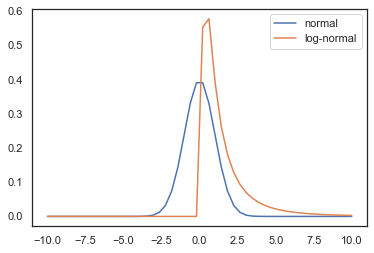

The lognormal right tail is much thicker than the normal tail. So although the normal tail does not have a heavy right tail, it is still possible for the lognormal to have one.


In [31]:
print('For some intution on the difference in tails of the normal and lognormal distributions we will plot both PDF curves')
mu = 0
sigma = 1

x = np.linspace(-10,10)
plt.plot(x, stats.norm.pdf(x, mu, sigma), label = 'normal')
plt.plot(x, stats.lognorm.pdf(x, sigma), label = 'log-normal')
plt.legend()
plt.show()

print('The lognormal right tail is much thicker than the normal tail. So although the normal tail does not have a heavy right tail, it is still possible for the lognormal to have one.')

Indeed we will prove below that the log-normal distribution has a heavy right tail:

Proof:

Let t>0 well show that $ \lim_{x\to\infty} e^{tx}P(X>x)=\infty $
* We have $$ P(X>x) = 1 - P(X\leq x)) := \int_{x}^{\infty} \frac{e^{-ln(x)^2/2}}{x\sqrt{2\pi}} \,dx  $$ a differentiable function since we know that its derivative exists and is PDF(x) 
* $$ \lim_{x \to \infty} e^{tx} = \infty \text{ and}  \lim_{x \to \infty} \int_{x}^{\infty} \frac{e^{-ln(x)^2/2}}{x\sqrt{2\pi}} \,dx = 0 $$ so we must use l'hopital to solve.
* $$ \lim_{x \to \infty} e^{tx}\int_{x}^{\infty} \frac{e^{-ln(x)^2/2}}{x\sqrt{2\pi}} \,dx = \lim_{x \to \infty} \frac{\int_{x}^{\infty} \frac{e^{-ln(x)^2/2}}{x\sqrt{2\pi}} \,dx}{e^{-tx}} \stackrel{\text{l'hopital (0/0)}}{=} \lim_{x \to \infty} \frac{\frac{-e^{-ln(x)^2/2}}{x\sqrt{2\pi}}}{-te^{-tx}} = \lim_{x \to \infty} \frac{e^{tx-ln(x)^2/2}}{tx\sqrt{2\pi}}
\stackrel{\text{l'hopital ($\infty$/$\infty$)}}{=} \lim_{x \to \infty} \frac{(t-ln(x)/x)e^{tx-ln(x)^2/2}}{t\sqrt{2\pi}} $$
* $$ Since \lim_{x \to \infty} \frac{ln(x)}{x} = 0 , \lim_{x \to \infty} t-ln(x)/x = t $$ 
* Therefore $$ \lim_{x \to \infty} \frac{(t-ln(x)/x)e^{tx-ln(x)^2/2}}{t\sqrt{2\pi}} = \infty $$

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [32]:
T = np.array([
     [0.4, 0.2, 0.1, 0, 0.1, 0.2],
     [0.2, 0.4, 0.2, 0.1, 0, 0.1],
     [0.1, 0.2, 0.4, 0.2, 0.1, 0],
     [0, 0.1, 0.2, 0.4, 0.2, 0.1],
     [0.1, 0, 0.1, 0.2, 0.4, 0.2],
     [0.2, 0.1, 0, 0.1, 0.2, 0.4]
])

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

The expected value of the average of the trajectory should be close to 3.5 that is the expected value of any roll according to the stationary distribution of the markov chain.
empirical mean: 3.481266666666667
empirical std: 0.474632203805103


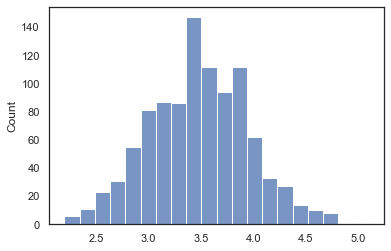

In [51]:
def roll_initial_die():
  roll = np.random.randint(1,7)
  return roll

def markov_build_trajectory(matrix, length):
  p0 = roll_initial_die()
  trajectory = [p0]

  for i in range(1,length):
    next = random.choices( np.arange(1, 7), T[trajectory[i-1]-1] )
    trajectory.append(next[0])
  
  return np.array(trajectory)


def markov_build_n_trajectories(T, length, n):
  trajectories = []
  for i in range(n):
    trajectories.append(markov_build_trajectory(T, length))
  
  return np.array(trajectories)

n = 1000
length = 30
t_30 = markov_build_n_trajectories(T, length, n)

print("The expected value of the average of the trajectory should be close to 3.5 that is the expected value of any roll according to the stationary distribution of the markov chain.")

av_30 = np.average(t_30, axis=1)
sns.histplot(av_30, bins=20)
av_30_mean = av_30.mean()
av_30_std = av_30.std()
print('empirical mean:', av_30_mean)
print('empirical std:', av_30_std)

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

Same as previous part, the average value of the trajectories should be expected value of a fair die roll as the stationary distribution of this markov chain tends to be uniform. 
With 500 steps in the trajectory, we are closer to stationarity and the expected deviation should be lower.

empirical mean: 3.4925680000000003
empirical std: 0.12391886610197818


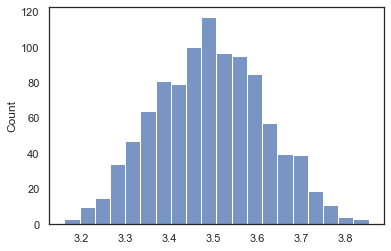

In [34]:
n = 1000
length = 500
t_500 = markov_build_n_trajectories(T, length, n)


av_500 = np.average(t_500, axis=1)
sns.histplot(av_500, bins=20)
av_500_mean = av_500.mean()
av_500_std = av_500.std()
print('empirical mean:', av_500_mean)
print('empirical std:', av_500_std)

#### 4.C
Draw normal fit curves on your two histograms.

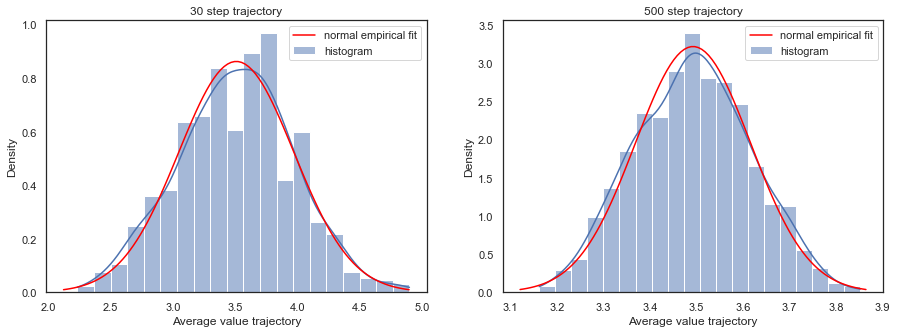

In [39]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
sns.histplot(av_30, bins=20, kde=True, stat="density", ax=axes[0], label='histogram')
axes[0].set_title('30 step trajectory')
axes[0].set_xlabel('Average value trajectory')
x = np.linspace(av_30_mean - 3*av_30_std, av_30_mean + 3*av_30_std, 100)
axes[0].plot(x, stats.norm.pdf(x, av_30_mean, av_30_std), color='red', label='normal empirical fit')
axes[0].legend()

sns.histplot(av_500, bins=20,   kde=True, stat="density", ax=axes[1], label='histogram')
axes[1].set_title('500 step trajectory')
axes[1].set_xlabel('Average value trajectory')
x = np.linspace(av_500_mean - 3*av_500_std, av_500_mean + 3*av_500_std, 100)
axes[1].plot(x, stats.norm.pdf(x, av_500_mean, av_500_std), color='red', label='normal empirical fit')
axes[1].legend()
plt.show()


#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [56]:
#Cov(X0,Xi) = Cov(x,y) = E(xy) - E(x)E(y)
def cov_x_y(T, p0, i):
  die = np.array([1,2,3,4,5,6])
  E_x = np.matmul(die,p0.T)
  #print('Ex', E_x)

  transitions = np.linalg.matrix_power(T,i)
  #normalizing so it is a prob distribution
  t_normalized = transitions / np.sum(transitions)

  E_y = np.sum( np.matmul(die,t_normalized) )
  #print('EY', E_y)


  E_xy = 0
  for x in range(1,7):
    for y in range(1,7):
      E_xy += ( (x)* (y) *t_normalized[x-1, y-1] )

  #print('EXY', E_xy)

  cov = E_xy - E_x*E_y
  return cov

#use the function to compute X500.
i = 500
p0_array = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
cov = cov_x_y(T,p0_array, i)
print('Covariance chain length',i, ":", cov)

print("We expect that, after a certain threshold of i, E(Xi) is calculated with stationary distribution which will make E(Xi) to be same as E(X0).")
print("Also, as the process gets closer to stationarity, and using markov property, Xi will only depend on Xi-1, meaning that the relation with X0 should tend to 0.")

cov_list = []
for i in range(1,501):
  cov = cov_x_y(T,p0_array, i)
  cov_list.append(cov)
  #print('Covariance chain length',i, ":", cov)



Covariance chain length 500 : 0.0
We expect that, after a certain threshold of i, E(Xi) is calculated with stationary distribution which will make E(Xi) to be same as E(X0).
Also, as the process gets closer to stationarity, and using markov property, Xi will only depend on Xi-1, meaning that the relation with X0 should tend to 0.


Pretty fast (i close to 10), the covariance goes to a value close to 0.


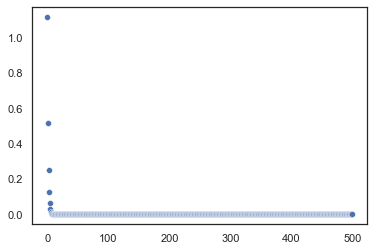

In [57]:
sns.scatterplot(x=np.arange(500),y=np.array(cov_list))
print("Pretty fast (i close to 10), the covariance goes to a value close to 0.")

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that 
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

1. As we have seen, the transition matrix for the given markov chain gets to a stationary distribution. This means step Xi is distributed as X0. Therefore we can use the following to calculate its expectation:

$E(\bar X_n)=\frac{1}{n}E(\sum_{i=1}^n X_i)= \frac{1}{n}\sum_{i=1}^nE(X_i)=E(X_i)=E(X_0)$


### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [41]:
import numpy as np
mu = [0,0]
S = [[2, 3], [3, 5]]
qty_samples = 10000000
samples = np.random.multivariate_normal(mu, S, qty_samples).T

start = timeit.default_timer()
tau_true, p_value = stats.kendalltau(samples[0], samples[1])
stop = timeit.default_timer()
print('Time: ', stop - start) 
print('Tau: ', tau_true)

Time:  9.839859622000006
Tau:  0.795116328997193


<AxesSubplot:>

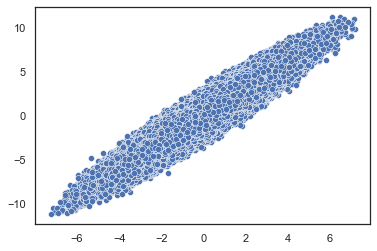

In [42]:
sns.scatterplot(x=samples[0], y = samples[1])

#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [44]:
def kendall_sub_sampling(base_data, qty_sub_samples):
  position_samples = np.random.randint(0,len(base_data.T), qty_sub_samples)
  sub_samples = samples.T[position_samples]
  tau, p_value = stats.kendalltau(sub_samples.T[0], sub_samples.T[1])
  return tau

start = timeit.default_timer()
qty_sub_samples = 1000
tau_sub_1 = kendall_sub_sampling(samples, qty_sub_samples)
stop = timeit.default_timer()
print('Time: ', stop - start) 
print('Tau sub sample:', tau_sub_1)

Time:  0.004085106000047745
Tau sub sample: 0.789937937937938


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

In [45]:
def repeat_kendall_sampling(base_data, qty_samples, repetitions):
  tau_list = []
  for i in range(repetitions):
    tau = kendall_sub_sampling(samples, qty_samples)
    tau_list.append(tau)
  return tau_list

repetitions = 1000
qty_sub_samples = 1000
tau_list = repeat_kendall_sampling(samples, qty_sub_samples, repetitions)
start = timeit.default_timer()
stop = timeit.default_timer()
print('Time: ', stop - start) 

Time:  6.705800001327589e-05


empirical mean: 0.7948950072105663 , std dev:  0.006861281969504809


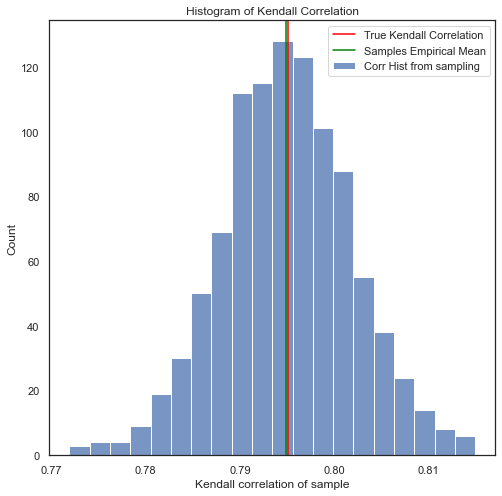

In [46]:
fig, axes = plt.subplots(1,1, figsize=(8, 8))
sns.histplot(tau_list, bins=20, ax=axes, label = 'Corr Hist from sampling')
axes.axvline(x=tau_true, color='red', label = 'True Kendall Correlation')
samples_mean, samples_std_dev = np.mean(tau_list), np.std(tau_list)
axes.axvline(x=samples_mean, color='green', label = 'Samples Empirical Mean')
axes.set_title('Histogram of Kendall Correlation')
axes.set_xlabel('Kendall correlation of sample')
axes.legend()

print('empirical mean:', samples_mean, ', std dev: ', samples_std_dev)


#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

In [47]:
repetitions = 1000
qty_points = [10,50,100,500,1000,5000]
tau_point_list = []
time_list = []
std_list = []

for i in range(len(qty_points)):
    start = timeit.default_timer()
    tau_list = repeat_kendall_sampling(samples, qty_points[i], repetitions)
    stop = timeit.default_timer()

    tau_point_list.append(tau_list)
    time_list.append(stop-start)
    std_list.append(np.std(tau_list))

tau_point_list = np.array(tau_point_list)
time_list = np.array(time_list)
std_list = np.array(std_list)

Text(0, 0.5, 'Size of sample')

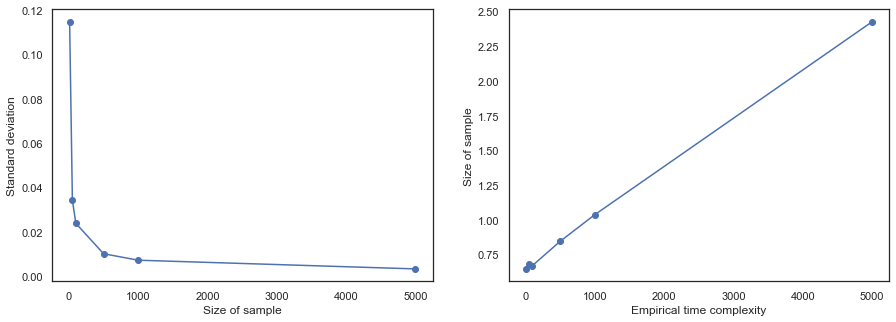

In [58]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].scatter(qty_points, std_list)
axes[0].plot(qty_points, std_list)
axes[0].set_ylabel('Standard deviation')
axes[0].set_xlabel('Size of sample')

axes[1].scatter(qty_points, time_list)
axes[1].plot(qty_points, time_list)
axes[1].set_xlabel('Empirical time complexity')
axes[1].set_ylabel('Size of sample')


The naive time complexity for kendall tau calculation is O(n^2). Taking advantage of implementing it with algorithms such as mergesort can solve it faster 
scipy.stats.kendalltau library does not take O(n^2), which can be observed in the second graph bellow
Also, a relevant observation is that when running 1000 iterations of 1000 or even 100 samples, we get a fairly low standard deviation. 

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [66]:
df = pd.read_csv('Kendall_data.csv', header=None)
print('Shape',df.shape)
df.head()

Shape (100, 2)


,0,1
0,-2.07,-2.83
1,2.12,3.46
2,-0.61,-1.54
3,-0.40,-0.57
4,0.05,-0.05


In [70]:
tau_hat, p_value = stats.kendalltau(df[0], df[1])
print('CSV calculated Tau', tau)

print("The 10M data points are considered to be the original population. We consider the calculated Kendall correlation in the previous part by sampling the original data.")
print("Let our null hypothesis be that our colleages dataset does not come from our generated population of 10M samples")

CSV calculated Tau 0.7806556689451707
The 10M data points are considered to be the original population. We consider the calculated Kendall correlation in the previous part by sampling the original data.
Let our null hypothesis be that our colleages dataset does not come from our generated population of 10M samples


In [74]:
#Based on results from the following sources, tau confidence interval can be calculated.
#https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Confidence_Intervals_for_Kendalls_Tau-b_Correlation.pdf
#https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?article=2158&context=jmasm

def fisher_transform(t):
    z = (1/2)*math.log((1+t)/(1-t))
    return z

def standard_error(n):
    return math.sqrt(0.437/(n-4))

def inverse_f_transform(z):
    ex = math.exp(2*z)
    t_inv = (ex-1)/(ex+1)
    return t_inv


def ci_kendall(tau_hat, samples, alpha):
    z = fisher_transform(tau_hat)
    transformed_ci_bound = stats.norm.ppf(1-alpha/2) * standard_error(n) #two sided confidence interval
    transformed_upper_bound = z + transformed_ci_bound
    transformed_lower_bound = z - transformed_ci_bound
    up_ci_bound = inverse_f_transform(transformed_upper_bound)
    low_ci_bound = inverse_f_transform(transformed_lower_bound)
    return low_ci_bound, up_ci_bound


alpha = 0.05 #95% 
n = 100
low_ci, upper_ci =  ci_kendall(tau_hat, n, alpha)

print("CI low bound", low_ci,"- CI high bound", upper_ci)
print("Original population tau aproximation by sampling", np.mean( tau_point_list[2] )) #from part 5.d

CI low bound 0.7234329085897167 - CI high bound 0.8272257480618167
Original population tau aproximation by sampling 0.794107474747475


From the observed data (colleagues dataset), we computed a CI that covers with 95% confidence the true population value. From part 5.d, we get an approximation to true 10M population Kentall Tau. We are 95% confident that this value should fall within the calculated interval, which indeed does. Therefore, with these results, we can reject the null hypothesis of our colleague's dataset not being from the population generated in section 5.A.